In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq

In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [3]:
cd /Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/091218-A250-2bar

/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/091218-A250-2bar


In [4]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
#files.remove('.DS_Store')
files.sort()
files

['025.txt',
 '050.txt',
 '075.txt',
 '100.txt',
 '125.txt',
 '150.txt',
 '175.txt',
 '200.txt',
 '225.txt',
 '250.txt',
 '275.txt',
 '300.txt',
 '325.txt',
 '350.txt',
 '375.txt',
 '400.txt',
 '425.txt']

In [5]:
names = []
for q in range(0,len(files)):
    na = files[q].split('.')[0]
    names.append(na)
names

['025',
 '050',
 '075',
 '100',
 '125',
 '150',
 '175',
 '200',
 '225',
 '250',
 '275',
 '300',
 '325',
 '350',
 '375',
 '400',
 '425']

In [6]:
ml = 1e3
avg=5
Xvals=dict()
Yvals=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    Xvals[q] = moving_average(Hold[0]*ml,avg)
    Yvals[q] = moving_average(Hold[1]*ml,avg)

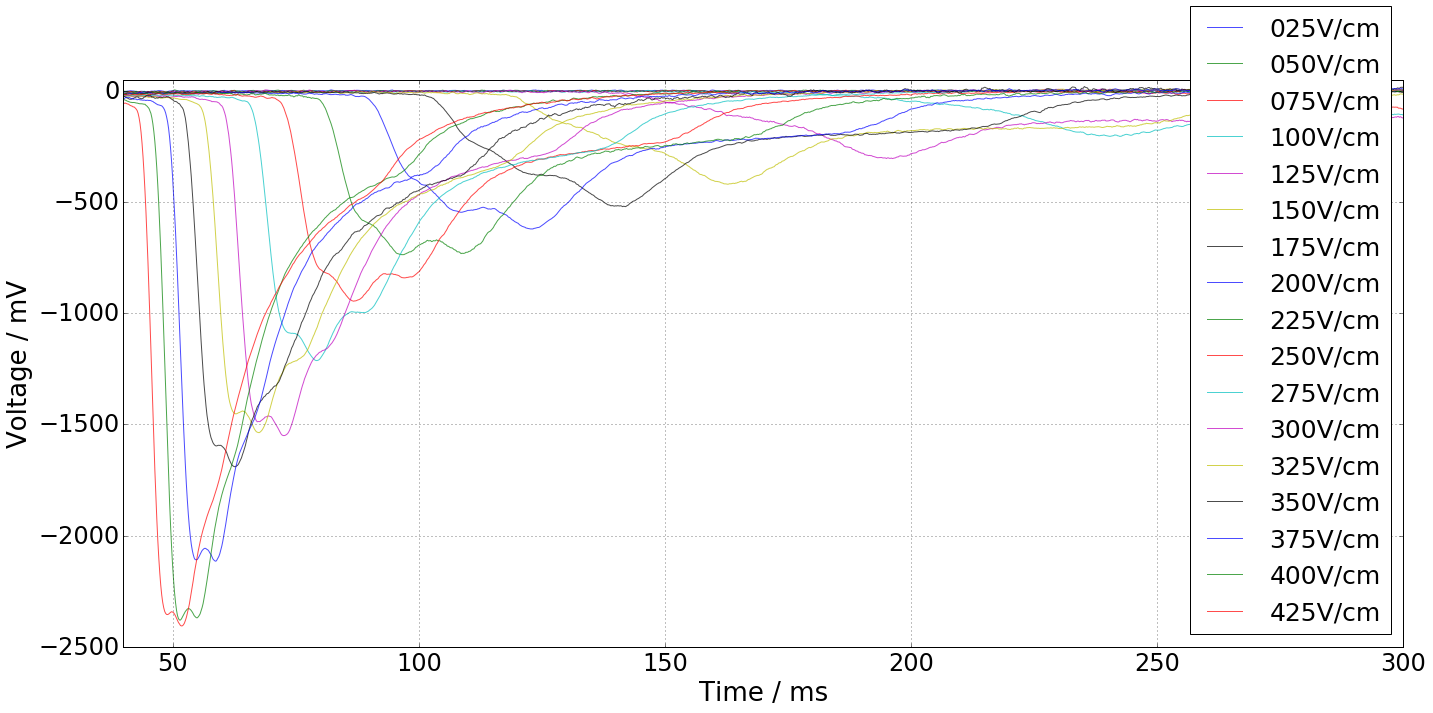

In [7]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    P=21
    PP=3
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(40,300)
plt.ylim(-2500,50)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.show()

125 -139892.372506
dx 0.199999994948


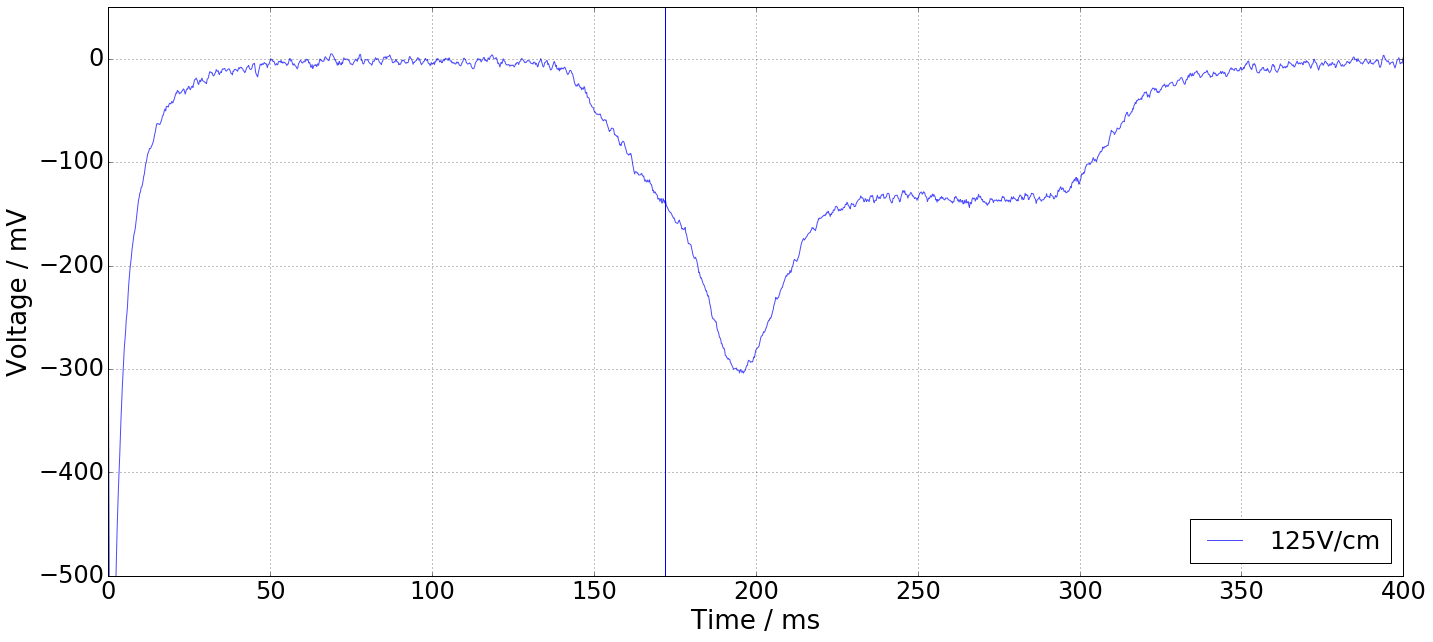

In [8]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    if names[q] == '125' :#or names[q]=='425': 
        XX = Xvals[q]
        YY = Yvals[q]
        dx = Xvals[q][3]-Xvals[q][2]
        plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7)
        
        print(names[q],sum(YY))
        print('dx',dx)
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,400)
plt.ylim(-500,50)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
plt.axvline(172)
plt.axvline(172)

#plt.savefig('plot-1.tif')
plt.show()

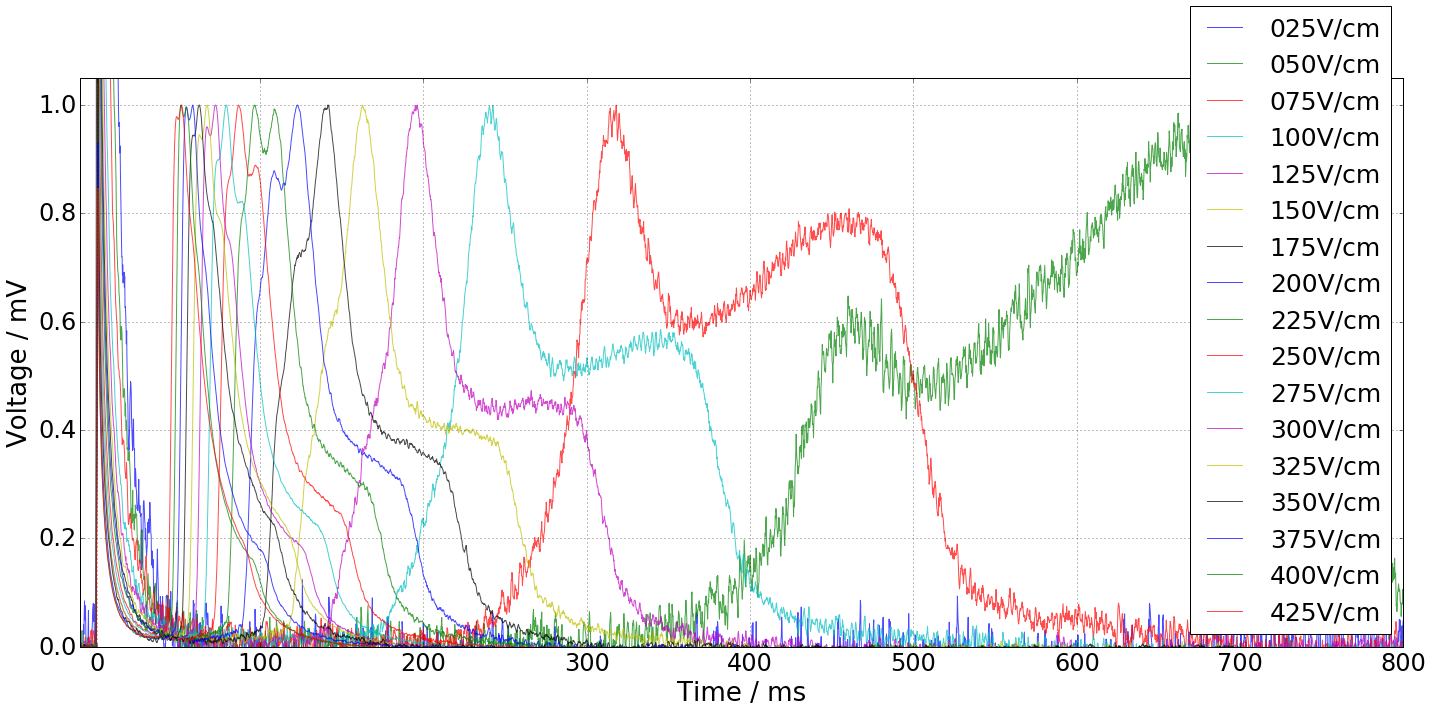

In [8]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    eh = find_nearest(Xvals[q],50)
    eh = np.where(Xvals[q]==eh)[0][0]
    norm = min(Yvals[q][eh:])
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY/norm,label=(names[q]+''+'V/cm'),alpha=0.7)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-10,800)
plt.ylim(0,1.05)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-2.tif')
plt.show()

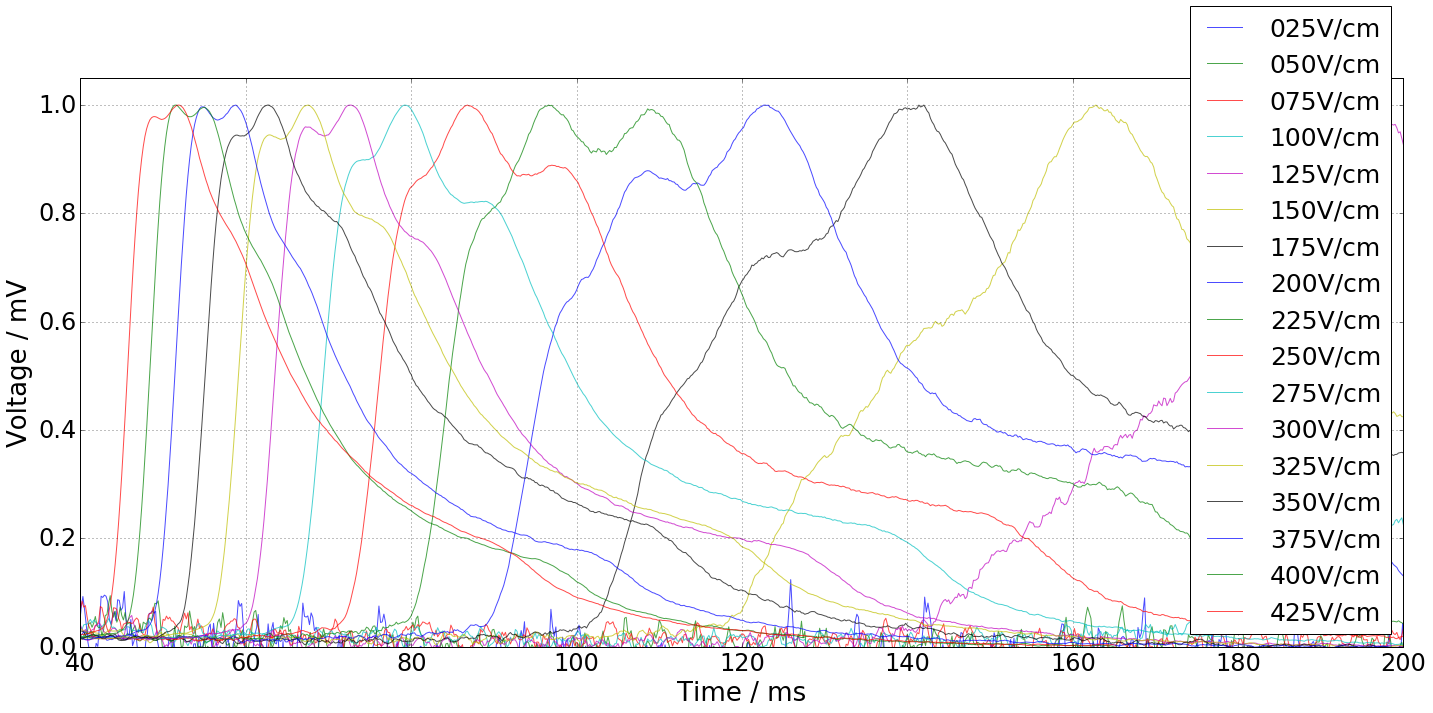

In [39]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    eh = find_nearest(Xvals[q],50)
    eh = np.where(Xvals[q]==eh)[0][0]
    norm = min(Yvals[q][eh:])
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY/norm,label=(names[q]+''+'V/cm'),alpha=0.7)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(40,200)
plt.ylim(0,1.05)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-3.tif')
plt.show()

In [9]:
names

['025',
 '050',
 '075',
 '100',
 '125',
 '150',
 '175',
 '200',
 '225',
 '250',
 '275',
 '300',
 '325',
 '350',
 '375',
 '400',
 '425']

425 -371163.167942
dx 0.199999994948


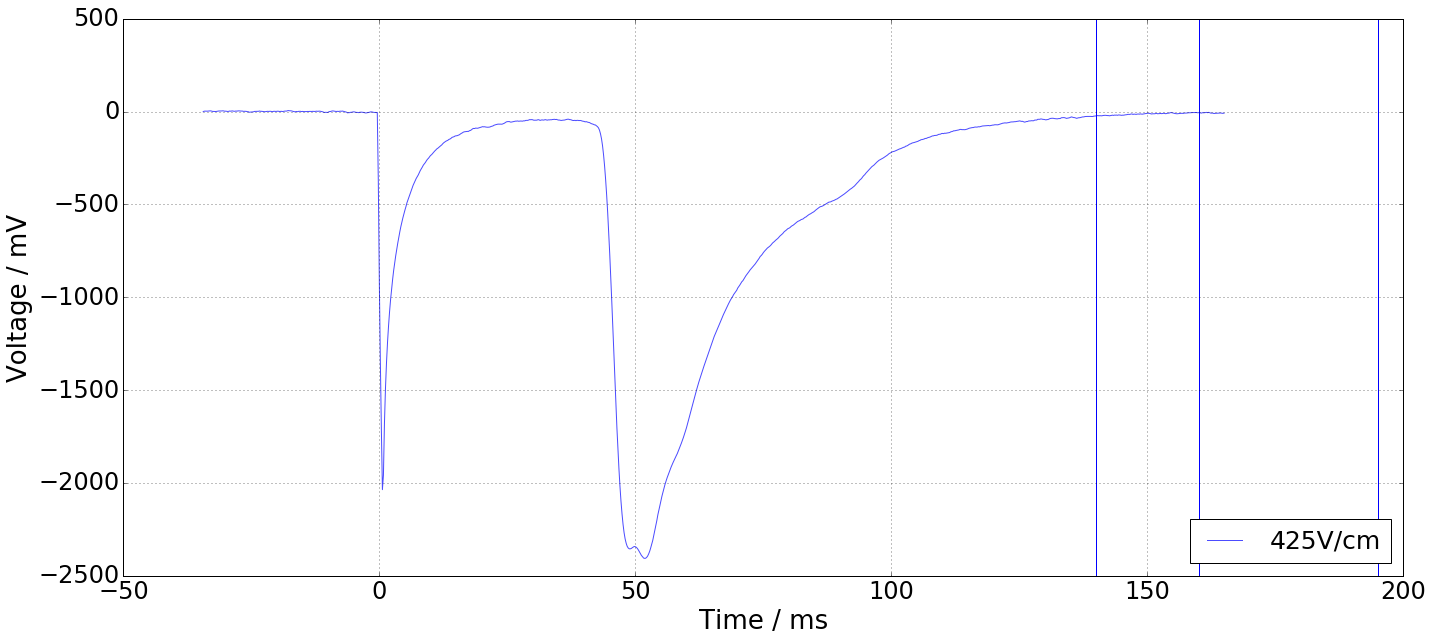

In [72]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    if names[q] == '425' :#or names[q]=='425': 
        XX = Xvals[q]
        YY = Yvals[q]
        dx = Xvals[q][3]-Xvals[q][2]
        plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7)
        
        print(names[q],sum(YY))
        print('dx',dx)
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
#plt.xlim(130,300)
#plt.ylim(-210,50)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
plt.axvline(140)
plt.axvline(160)
plt.axvline(195)

#plt.savefig('plot-1.tif')
plt.show()

In [75]:
peak1 = np.array([140,128,111,99,88,80,72,67,62,58,55,51,49])
peak2 = np.array([160,140,123,107,97,88,79,73,68,63,59,55,52])
peak3 = np.array([195,162,140,123,110,99,89,82,76,71,67,62,59])
len(peak1)

13

In [80]:
nn = np.array([100,
 125,
 150,
 175,
 200,
 225,
 250,
 275,
 300,
 325,
 350,
 375,
 400,])
nn = nn[::-1]
nn

array([400, 375, 350, 325, 300, 275, 250, 225, 200, 175, 150, 125, 100])

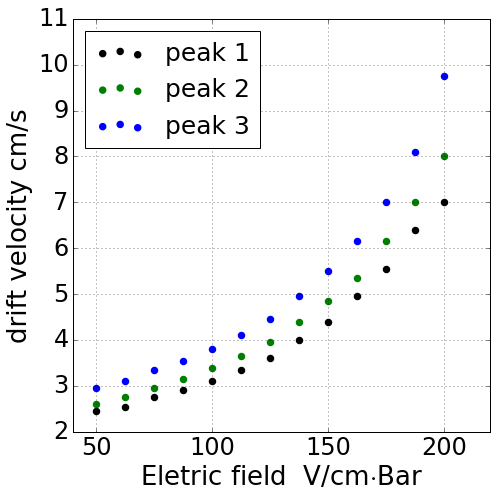

In [91]:
plt.figure(figsize=(7,7))
plt.scatter(nn/2,peak1/20,color='k',linewidth=3,label='peak 1')
plt.scatter(nn/2,peak2/20,color='g',linewidth=3,label='peak 2')
plt.scatter(nn/2,peak3/20,color='b',linewidth=3,label='peak 3')

#plt.xlim(0,105)
#plt.ylim(20,155)
plt.xlabel(r'Eletric field  V/cm$\cdot$Bar',fontsize=26)
plt.ylabel(r'drift velocity cm/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.xticks(np.arange(50, 220, 50.0))
#plt.semilogy()
plt.grid()
plt.legend(loc='upper left',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


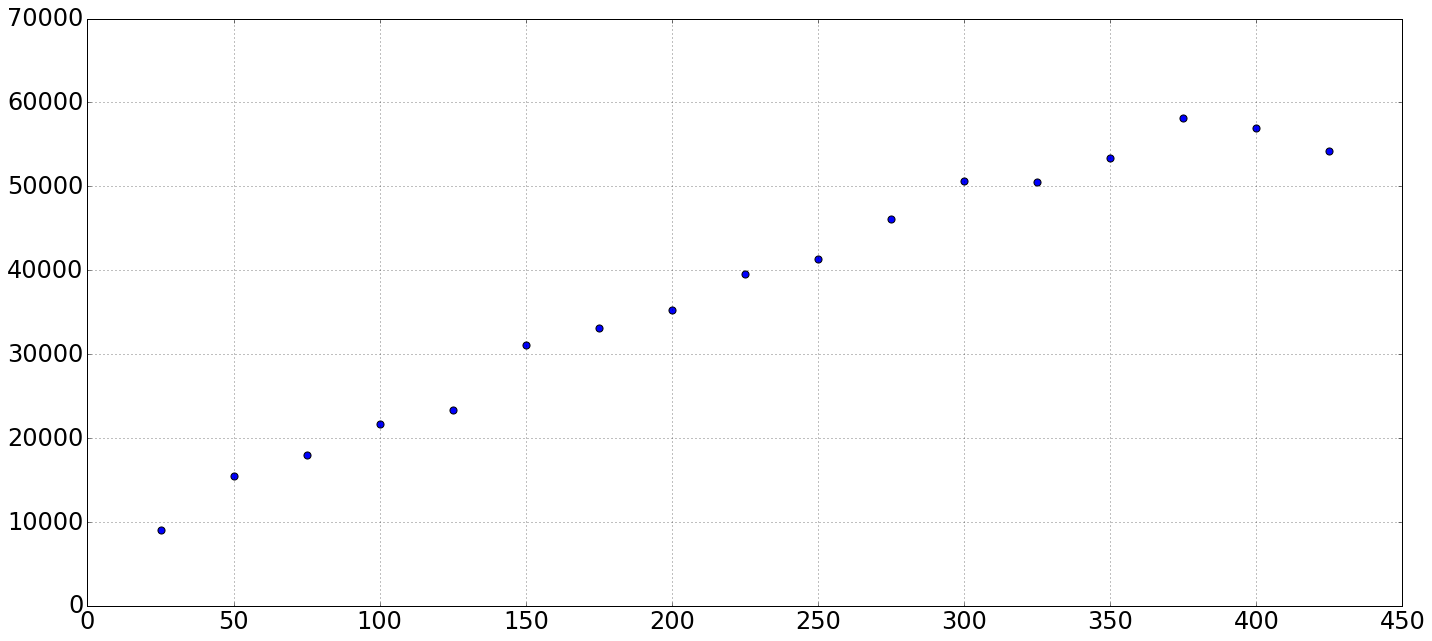

In [10]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)):
    eh = find_nearest(Xvals[q],50)
    eh = np.where(Xvals[q]==eh)[0][0]
    area = sum(Yvals[q][eh:])
    dx = Xvals[q][3]-Xvals[q][2]

    plt.scatter(int(names[q]),abs(area*dx),s=50)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
#plt.xlim(-10,800)
#plt.ylim(0,1.05)
#plt.xlabel(r'Time / ms',fontsize=26)
#plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25)
plt.tight_layout()
#plt.savefig('ions-clean-90418.tif')
plt.show()

In [46]:
area*dx

-54196.987321830384

In [9]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger


In [58]:
eh = find_nearest(Xvals[q],50)
eh = np.where(Xvals[q]==eh)[0][0]

In [59]:
time,width = find_vals(Xvals[0],Yvals[0],eh)
time

0.69692186915199272

In [65]:
Velocity=[]
Efield =[]
FWHM  =[]
for q in range(0,len(files)):
    time,width = find_vals(Xvals[q],Yvals[q],eh)
    V      = 20/(time)
    Velocity.append(V)
    Efield.append(float(names[q]))
    FWHM.append(width)
Velocity = np.array(Velocity)
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [66]:
FWHM

array([  1.79999995,   2.39999994,   2.59999993,   2.99999992,
         3.59999991,   2.19999994,   2.19999994,   2.19999994,
         2.19999994,  79.199998  ,  93.39999764,   2.39999994,
        82.59999791,  78.999998  ,  20.59999948,  17.39999956,  15.59999961])

In [ ]:
Velocity=[]
Efield =[]
FWHM  =[]
for q in range(0,len(files)):
    eh = find_nearest(Xvals[q],50)
    eh = np.where(Xvals[q]==eh)[0][0]
    mm = min(Yvals[eh:])
    np.where(Yvals[eh:]==mm)[0][0]
    V      = 20/(time)
    Velocity.append(V)
    Efield.append(float(names[q]))
    FWHM.append(width)
Velocity = np.array(Velocity)
Efield = np.array(Efield)
FWHM = np.array(FWHM)

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


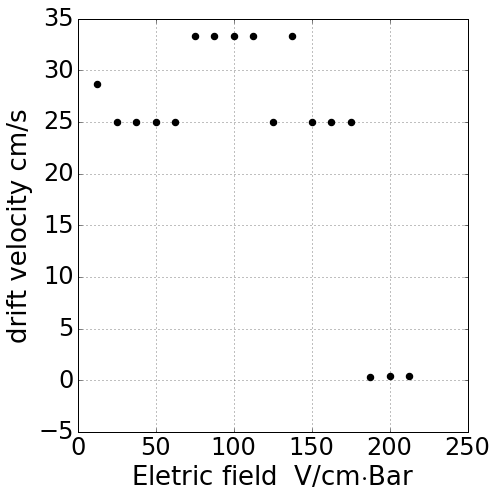

In [67]:
plt.figure(figsize=(7,7))
plt.scatter(Efield/2,Velocity,color='k',linewidth=3)

#plt.xlim(0,105)
#plt.ylim(20,155)
plt.xlabel(r'Eletric field  V/cm$\cdot$Bar',fontsize=26)
plt.ylabel(r'drift velocity cm/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('BTX_ION_drift_ION_5-18-17-2.pdf')
plt.show()

In [16]:
vals = np.polyfit(Efield/2,Velocity,1)
np.poly1d(vals)[0]

1.7264611024940004

In [17]:
vals

array([ 1.47765616,  1.7264611 ])

In [15]:
np.polyfit?

In [ ]:
poly

In [ ]:
FWHM[0:6]

In [ ]:
x = np.log(Efield[1:6])
y = np.log(FWHM[1:6])
poly=np.polyfit(x,y,1)

In [ ]:
plt.plot(x,y,'o')
plt.plot(x,np.poly1d(poly)(x))

In [ ]:
poly

In [ ]:
np.poly1d?

In [ ]:
Efield, FWHM = zip(*sorted(zip(Efield, FWHM)))
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [ ]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)
popt
pcov

In [ ]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)

plt.figure(figsize=(7,7))
plt.scatter(Efield,FWHM,color='m',linewidth=3,label='data')
#plt.plot(Efield,ef(Efield,*popt),'r',label='fit')
x=np.arange(1,30,0.1)
plt.plot(np.exp(x),np.exp(np.poly1d(poly)(x)))

#vars=np.logspace(1,3,10)
#plt.plot(vars,10**np.poly1d(poly)(np.log(vars)))
plt.xlabel(r'Eletric field  V/cm',fontsize=26)
plt.ylabel(r'pulse FWHM ms',fontsize=26)
plt.xlim(10,1000)
plt.ylim(50,300)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(np.arange(50, 210, 25))
plt.loglog()
plt.legend(loc="upper right",fontsize=24)
plt.show()